<a href="https://colab.research.google.com/github/t1seo/AIFFEL/blob/master/PyTorch/01_tensor%20and%20backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 텐서

텐서(Tensor)는 파이토치의 기본 단위

## 1.1 텐서 만들기

In [1]:
import torch
import numpy as np

In [3]:
# 빈 텐서 생성
x = torch.empty(5, 4) # 5x4 행렬 생성
print(x) # 초기화되지 않은 행렬의 경우 해당 시점에 할당된 메모리에 존재하던 값들이 초기값으로 나타난다.

tensor([[-5.2781e-18,  3.0621e-41,  7.0065e-44,  6.8664e-44],
        [ 6.3058e-44,  6.7262e-44,  7.7071e-44,  6.3058e-44],
        [ 7.0065e-44,  7.1466e-44,  1.1771e-43,  6.7262e-44],
        [ 7.2868e-44,  8.1275e-44,  7.2868e-44,  7.8473e-44],
        [ 8.1275e-44,  7.1466e-44,  7.4269e-44,  6.4460e-44]])


In [4]:
torch.ones(3, 3)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [5]:
torch.zeros(2)

tensor([0., 0.])

In [6]:
torch.rand(5, 6)

tensor([[0.8037, 0.9992, 0.1652, 0.5669, 0.2569, 0.2007],
        [0.1515, 0.6529, 0.5740, 0.8526, 0.4986, 0.1803],
        [0.9460, 0.6634, 0.2820, 0.2864, 0.8008, 0.9121],
        [0.4364, 0.0116, 0.9948, 0.2849, 0.4051, 0.6477],
        [0.5259, 0.1819, 0.5358, 0.6208, 0.4772, 0.6786]])

## 1.2 리스트, 넘파이 배열을 텐서로 만들기

In [8]:
l = [13, 4]
r = np.array([4, 56, 7])

In [9]:
torch.tensor(l) # 리스트를 텐서로

tensor([13,  4])

In [10]:
torch.tensor(r) # 넘파이를 텐서로

tensor([ 4, 56,  7])

## 1.3 텐서의 크기와 타입 확인하기

In [11]:
x.size()[1] # .size()는 텐서의 크기르 확인할 수 있다

4

In [13]:
x.size()

torch.Size([5, 4])

In [14]:
type(x)

torch.Tensor

## 1.4 텐서의 덧셈

In [15]:
x = torch.rand(2, 2)
y = torch.rand(2, 2)
print(x)
print(y)

tensor([[0.5051, 0.1307],
        [0.4932, 0.5864]])
tensor([[0.6606, 0.3873],
        [0.0070, 0.8141]])


In [16]:
x + y

tensor([[1.1657, 0.5180],
        [0.5002, 1.4005]])

In [17]:
torch.add(x, y)

tensor([[1.1657, 0.5180],
        [0.5002, 1.4005]])

In [18]:
y.add(x)

tensor([[1.1657, 0.5180],
        [0.5002, 1.4005]])

In [19]:
y.add_(x) # y 값을 대체(inplace)
y

tensor([[1.1657, 0.5180],
        [0.5002, 1.4005]])

## 1.5 텐서의 크기 변환하기

In [20]:
x = torch.rand(8, 8)
print(x.size())

torch.Size([8, 8])


In [21]:
a = x.view(64) # 크기 바꿔주는 view 8x8 -> 64
print(a.size())

torch.Size([64])


In [22]:
b = x.view(-1, 4, 4)
print(b.size())

torch.Size([4, 4, 4])


## 1.6 텐서에서 넘파이로 만들기

In [23]:
x = torch.rand(8, 8)
y = x.numpy() # 텐서 -> 넘파이
print(y)

[[0.02572322 0.8461993  0.32734412 0.36940122 0.46853703 0.28800815
  0.52781856 0.7276293 ]
 [0.9368109  0.08959997 0.84878916 0.36742508 0.54096204 0.09148967
  0.5641159  0.43398732]
 [0.176678   0.24081731 0.9651464  0.79904246 0.93500596 0.29661012
  0.2508949  0.07726771]
 [0.53737634 0.48134655 0.06135941 0.14319903 0.9065701  0.06266516
  0.38417596 0.12000889]
 [0.95613194 0.07781953 0.86836463 0.72126085 0.43709874 0.24500859
  0.52156097 0.28458965]
 [0.9812017  0.2495057  0.69453037 0.6259931  0.71960133 0.3594743
  0.08766323 0.06184697]
 [0.64320755 0.6188917  0.5598605  0.3753699  0.08094692 0.26121807
  0.38984478 0.8613112 ]
 [0.23257488 0.0310449  0.25991875 0.64040744 0.15107578 0.63736016
  0.24299079 0.02941036]]


In [24]:
type(y)

numpy.ndarray

## 1.7 단일 텐서에서 값으로 뽑아내기

In [25]:
x = torch.ones(1)

In [27]:
print(x)
print(x.item()) # 최종 결과값 뽑을 때 사용 단일 숫자로 이루어진 텐서 -> 그냥 숫자

tensor([1.])
1.0


# 2. 역전파

## 2.1 자동 미분 준비하기

In [28]:
import torch

In [30]:
# requires_grad=True는 해당 텐서를 기준으로 모든 연산들을 추적할 수 있게 하는 옵션
x = torch.ones(2, 2, requires_grad=True) # x에 대한 연쇄 법칙을 이용한 미분이 가능하다
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [32]:
# 합성 함수 
y = x + 1
z = 2 * y ** 2
res = z.mean()
print("y: ", y)
print("z: ", z)
print("Result: ", res)

# x에 연관된 연산을 계속 추적한다

y:  tensor([[2., 2.],
        [2., 2.]], grad_fn=<AddBackward0>)
z:  tensor([[8., 8.],
        [8., 8.]], grad_fn=<MulBackward0>)
Result:  tensor(8., grad_fn=<MeanBackward0>)


- `grad_fn=..`은 추적이 잘 되고 있다는 의미

## 2.2 역전파

In [33]:
res.backward() # res를 기준으로 역전파를 진행하겠다는 의미

# 역으로 식을 써내려 가보자.
# res = (z_1 + .. +z_4)/4
# z_i = 2 y_i **2
# z_i = 2(x_i+1)**2
# d(res)/dx_i = x_i + 1


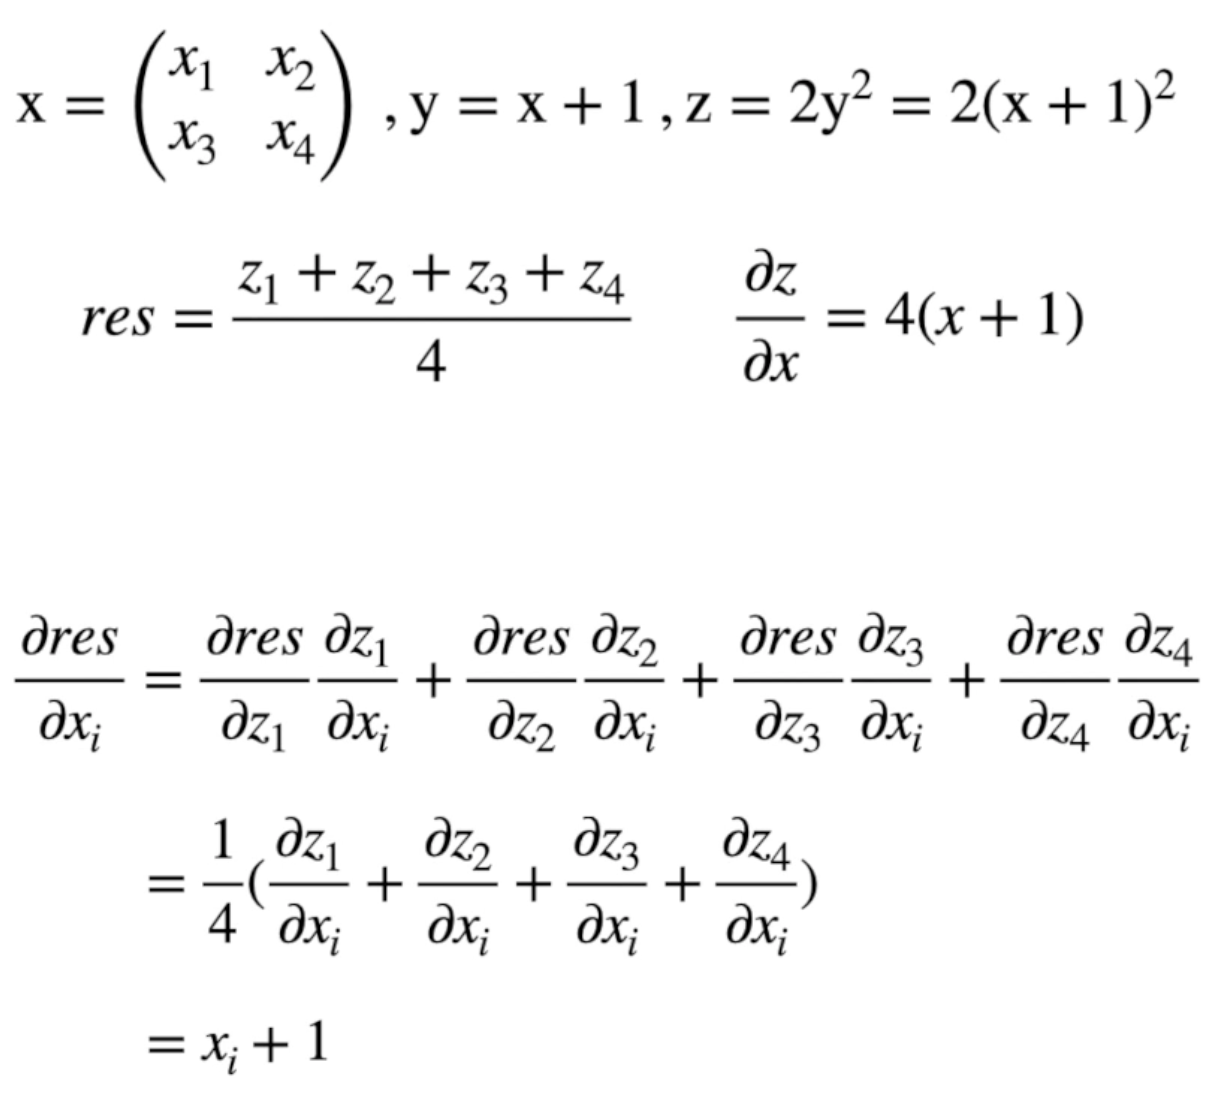

In [36]:
print(x)
print(x.grad) # x.grad는 backward()가 선언 된 변수를 기준으로 미분한다. 즉 d(res)/dx를 계산한다.
# d(res) / dx_i = x_i + 1

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[2., 2.],
        [2., 2.]])
